In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = './city_data.csv'
ride_data_to_load = './ride_data.csv'

# Read the City and Ride Data
city_data_df=pd.read_csv('./city_data.csv')
ride_data_df=pd.read_csv('./ride_data.csv')
# Combine the data into a single dataset
ride_city_df=pd.merge(city_data_df,ride_data_df,on="city",how='left')
# Display the data table for preview
ride_city_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


# Bubble Plot of Ride Sharing Data

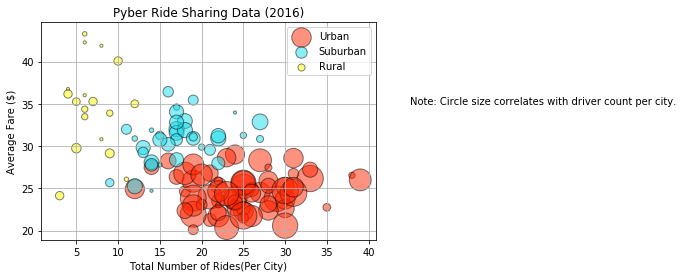

In [2]:
# Create filtered dataframes by type
urban_cities = ride_city_df[ride_city_df["type"] == "Urban"]

# For each filtered dataframe, groupby city and get the info we want to plot
urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

suburban_cities = ride_city_df[ride_city_df["type"] == "Suburban"]
suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_cities = ride_city_df[ride_city_df["type"] == "Rural"]
rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

#City type data frames
urban_df=pd.DataFrame({"Ride Count": urban_ride_count,
                      "Average Fare":urban_avg_fare,
                      "Driver Count":urban_driver_count})

suburban_df=pd.DataFrame({"Ride Count": suburban_ride_count,
                      "Average Fare":suburban_avg_fare,
                      "Driver Count":suburban_driver_count})

rural_df=pd.DataFrame({"Ride Count": rural_ride_count,
                      "Average Fare":rural_avg_fare,
                      "Driver Count":rural_driver_count})

# Build the scatter plots for each city types
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count,c='#ff2500',alpha=0.5,edgecolors='black',label="Urban")
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count,c='#1ADCEC',alpha=0.5,edgecolors='black',label='Suburban')
plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_driver_count,c='#FFFF00',alpha=0.5,edgecolors='black',label="Rural")

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(b=bool,which='both')

# Create a legend
plt.legend()


# Incorporate a text label regarding circle size
plt.text(45, 35,"Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig('Pyber Ride Sharing Data Bubble Plot.png',bbox_inches="tight")

# Total Rides by City Type

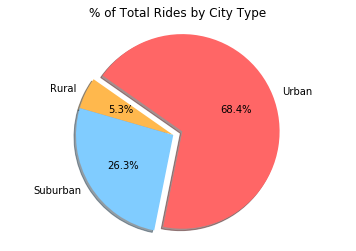

In [3]:
# Calculate Type Percents
groupedby_type=ride_city_df.groupby(["type"])
total_rides=groupedby_type["ride_id"].count()

# Build Pie Chart
labels=total_rides.index
ride_colors=['#ffb84d','#80ccff','#ff6666']
explode=(0,0,0.1)

plt.pie(total_rides,explode=explode,labels=labels,colors=ride_colors,
        autopct="%1.1f%%",shadow=True,startangle=145)
plt.axis('equal')
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('Total Rides by City Type.png',bbox_inches="tight")

# Total Fares by City Type

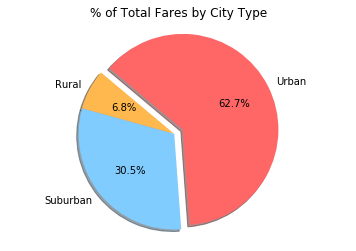

In [4]:
#Used the merged data grouped by city type to calcuate the sum of the
#fares for each city type
total_fares=groupedby_type["fare"].sum()
total_fares

#Create pie chart
plt.pie(total_fares,explode=explode,labels=labels,colors=ride_colors,
        autopct="%1.1f%%",shadow=True,startangle=140)
plt.axis('equal')
plt.title('% of Total Fares by City Type')

#Save figure
plt.savefig('Total Fares by City Type.png',bbox_inches="tight")

# Total Drivers by City Type

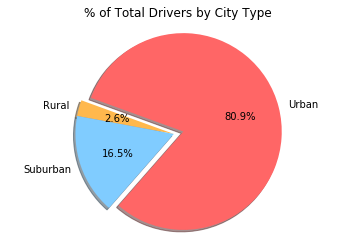

In [5]:
#Group city data by type and find the total number of drivers for each
#city type
city_data_type=city_data_df.groupby(['type'])
total_drivers=city_data_type["driver_count"].sum()

#Create pie chart
plt.pie(total_drivers,explode=explode,labels=labels,colors=ride_colors,
        autopct="%1.1f%%",shadow=True,startangle=160)
plt.axis('equal')
plt.title('% of Total Drivers by City Type')

#Save figure
plt.savefig('Total Drivers by City Type.png',bbox_inches="tight")